# Metro Interstate Traffic Volume Data Set

**Data Set Information:**

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.


**Attribute Information:**

_holiday_ Categorical US National holidays plus regional holiday, Minnesota State Fair <br>
_temp_    Numeric Average temp in kelvin <br>
_rain_1h_ Numeric Amount in mm of rain that occurred in the hour <br>
_snow_1h_ Numeric Amount in mm of snow that occurred in the hour <br>
_clouds_all_ Numeric Percentage of cloud cover <br>
_weather_main_ Categorical Short textual description of the current weather <br>
_weather_description_ Categorical Longer textual description of the current weather <br>
_date_time_ DateTime Hour of the data collected in local CST time <br>
_traffic_volume_ Numeric Hourly I-94 ATR 301 reported westbound traffic volume <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
metro_df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')

## 1. Explore the data

In [3]:
metro_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
metro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
metro_df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


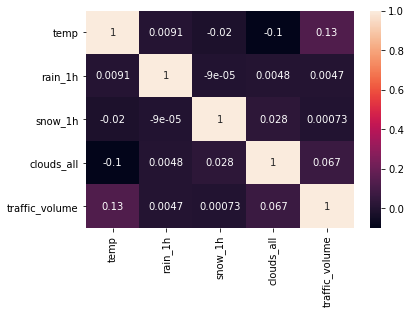

In [6]:
sns.heatmap(metro_df.corr(), annot=True)

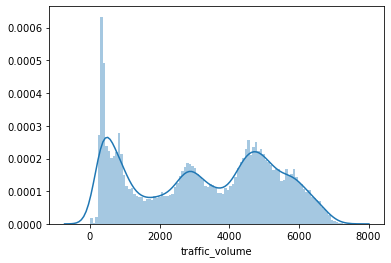

In [7]:
sns.distplot(metro_df['traffic_volume'],bins=100)

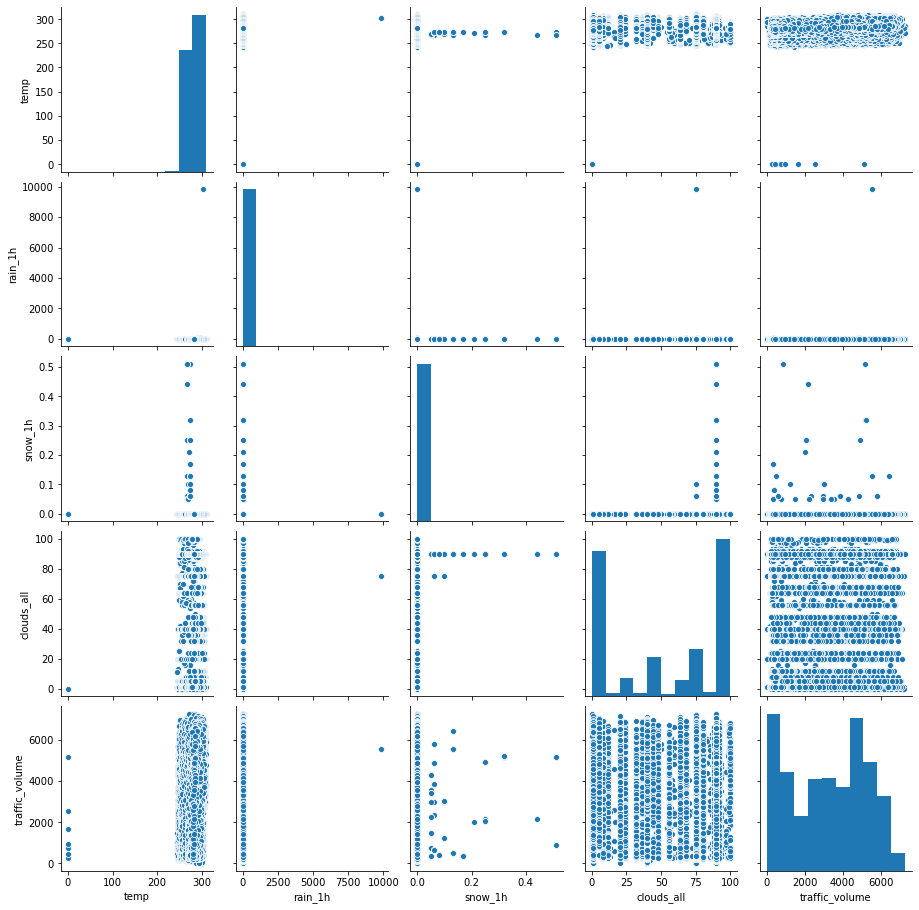

In [8]:
sns.pairplot(metro_df)

In [9]:
metro_df[metro_df['holiday'] == 'None']['traffic_volume'].describe()

count    48143.00000
mean      3262.85217
std       1986.26239
min          0.00000
25%       1198.00000
50%       3385.00000
75%       4934.00000
max       7280.00000
Name: traffic_volume, dtype: float64

In [10]:
metro_df['temp'].value_counts().sort_index()

0.00      10
243.39     1
243.62     1
244.22     1
244.82     3
          ..
308.87     1
308.95     1
309.08     1
309.29     1
310.07     1
Name: temp, Length: 5843, dtype: int64

In [11]:
metro_df[metro_df['temp'] == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11898,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 03:00:00,361
11899,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 04:00:00,734
11900,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 05:00:00,2557
11901,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-01-31 06:00:00,5150
11946,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 03:00:00,291
11947,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 04:00:00,284
11948,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 05:00:00,434
11949,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 06:00:00,739
11950,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 07:00:00,962
11951,None,0.0,0.0,0.0,0,Clear,sky is clear,2014-02-02 08:00:00,1670


In [12]:
metro_df[metro_df['date_time'] == '2014-01-31 02:00:00']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11897,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 02:00:00,313


In [13]:
metro_df[metro_df['date_time'] == '2014-01-31 07:00:00']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11902,None,255.93,0.0,0.0,0,Clear,sky is clear,2014-01-31 07:00:00,5363


In [14]:
metro_df[metro_df['date_time'] == '2014-02-02 02:00:00']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11945,None,255.37,0.0,0.0,0,Clear,sky is clear,2014-02-02 02:00:00,539


In [15]:
metro_df[metro_df['date_time'] == '2014-02-02 09:00:00']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11952,None,255.62,0.0,0.0,0,Clear,sky is clear,2014-02-02 09:00:00,2506


In [16]:
metro_df['holiday'].unique()

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [17]:
metro_df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [18]:
metro_df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [19]:
metro_df['rain_1h'].unique().mean()

31.032473118279576

In [20]:
metro_df['snow_1h'].unique().mean()

0.19333333333333333

In [21]:
metro_df[metro_df['traffic_volume'] == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
25186,None,296.68,0.0,0.0,40,Rain,light rain,2016-07-23 18:00:00,0
25191,None,295.90,0.0,0.0,90,Haze,haze,2016-07-23 23:00:00,0


We can observe that a maximum *traffic_volume* is interconnected with **political** activities

In [22]:
# Women’s March in St. Paul draws an estimated 90,000 to 100,000
# https://www.mprnews.org/story/2018/01/19/womens-march-minnesota-shifts-focus-from-rallies-to-commitment
metro_df[metro_df['traffic_volume'] == 7280]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
31615,None,270.75,0.0,0.0,90,Clouds,overcast clouds,2017-03-09 16:00:00,7280


### Numbers in holidays

In [23]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'Columbus Day')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
126,Columbus Day,273.080,0.0,0.0,20,Clouds,few clouds,2012-10-08 00:00:00,455
9455,Columbus Day,277.720,0.0,0.0,0,Clear,Sky is Clear,2013-10-14 00:00:00,615
18946,Columbus Day,293.020,0.0,0.0,1,Clear,sky is clear,2015-10-12 00:00:00,494
27224,Columbus Day,282.341,0.0,0.0,0,Clear,Sky is Clear,2016-10-10 00:00:00,484
37882,Columbus Day,284.620,0.0,0.0,1,Clear,sky is clear,2017-10-09 00:00:00,549


In [24]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'Veterans Day')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
1123,Veterans Day,288.12,0.0,0.0,87,Clear,sky is clear,2012-11-12 00:00:00,1000
9768,Veterans Day,275.44,0.0,0.0,64,Clouds,broken clouds,2013-11-11 00:00:00,514
19410,Veterans Day,283.35,0.0,0.0,75,Clouds,broken clouds,2015-11-11 00:00:00,559
27983,Veterans Day,281.96,0.0,0.0,1,Clear,sky is clear,2016-11-11 00:00:00,572
38803,Veterans Day,261.68,0.0,0.0,1,Clear,sky is clear,2017-11-10 00:00:00,812


In [25]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'Thanksgiving Day')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
1370,Thanksgiving Day,278.54,0.0,0.0,20,Mist,mist,2012-11-22 00:00:00,919
10181,Thanksgiving Day,268.24,0.0,0.0,64,Clouds,broken clouds,2013-11-28 00:00:00,929
19675,Thanksgiving Day,277.22,0.0,0.0,90,Mist,mist,2015-11-26 00:00:00,833
19676,Thanksgiving Day,277.22,0.0,0.0,90,Haze,haze,2015-11-26 00:00:00,833
28399,Thanksgiving Day,274.34,0.0,0.0,75,Mist,mist,2016-11-24 00:00:00,763
39180,Thanksgiving Day,271.94,0.0,0.0,1,Clear,sky is clear,2017-11-23 00:00:00,1324


In [26]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'Christmas Day')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
2360,Christmas Day,264.40,0.00,0.0,90,Clouds,overcast clouds,2012-12-25 00:00:00,803
10939,Christmas Day,260.17,0.25,0.0,64,Rain,light rain,2013-12-25 00:00:00,712
20185,Christmas Day,269.09,0.00,0.0,90,Snow,light snow,2015-12-25 00:00:00,894
29503,Christmas Day,276.08,0.00,0.0,90,Rain,light rain,2016-12-26 00:00:00,732
29504,Christmas Day,276.08,0.00,0.0,90,Mist,mist,2016-12-26 00:00:00,732
40057,Christmas Day,257.95,0.00,0.0,1,Clear,sky is clear,2017-12-25 00:00:00,1092


In [27]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'New Years Day')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
2559,New Years Day,263.49,0.0,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
11132,New Years Day,250.14,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 00:00:00,1395
20344,New Years Day,265.94,0.0,0.0,90,Haze,haze,2016-01-01 00:00:00,1513
20345,New Years Day,265.94,0.0,0.0,90,Snow,light snow,2016-01-01 00:00:00,1513
29674,New Years Day,270.62,0.0,0.0,90,Snow,light snow,2017-01-02 00:00:00,798
40255,New Years Day,249.36,0.0,0.0,1,Clear,sky is clear,2018-01-01 00:00:00,1478


In [28]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'Washingtons Birthday')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
3697,Washingtons Birthday,258.960,0.0,0.0,20,Clouds,few clouds,2013-02-18 00:00:00,556
12303,Washingtons Birthday,267.440,0.0,0.0,90,Clouds,overcast clouds,2014-02-17 00:00:00,583
21294,Washingtons Birthday,265.350,0.0,0.0,90,Mist,mist,2016-02-15 00:00:00,785
31145,Washingtons Birthday,285.059,0.0,0.0,68,Clouds,broken clouds,2017-02-20 00:00:00,629
41611,Washingtons Birthday,270.730,0.0,0.0,20,Clouds,few clouds,2018-02-19 00:00:00,623


In [29]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'Memorial Day')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
6430,Memorial Day,286.370,0.0,0.0,90,Clouds,overcast clouds,2013-05-27 00:00:00,863
14645,Memorial Day,294.310,0.0,0.0,40,Clouds,scattered clouds,2014-05-26 00:00:00,967
23781,Memorial Day,288.380,0.0,0.0,1,Mist,mist,2016-05-30 00:00:00,1082
34095,Memorial Day,285.870,0.0,0.0,40,Clouds,scattered clouds,2017-05-29 00:00:00,1538
44441,Memorial Day,299.487,0.0,0.0,24,Clouds,few clouds,2018-05-28 00:00:00,1088


In [30]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'Independence Day')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
7414,Independence Day,290.08,0.0,0.0,1,Clear,sky is clear,2013-07-04 00:00:00,1060
16204,Independence Day,289.20,0.0,0.0,1,Clear,sky is clear,2015-07-03 00:00:00,959
24654,Independence Day,289.95,0.0,0.0,1,Clear,sky is clear,2016-07-04 00:00:00,1115
35057,Independence Day,293.41,0.0,0.0,1,Clear,sky is clear,2017-07-04 00:00:00,1225
45547,Independence Day,297.55,0.0,0.0,1,Mist,mist,2018-07-04 00:00:00,1021


In [31]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'State Fair')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
8575,State Fair,297.42,0.0,0.0,12,Clouds,few clouds,2013-08-22 00:00:00,661
17750,State Fair,287.97,0.0,0.0,1,Clear,sky is clear,2015-08-27 00:00:00,605
26002,State Fair,290.82,0.0,0.0,1,Clear,sky is clear,2016-08-25 00:00:00,655
36551,State Fair,289.69,0.0,0.0,90,Rain,light rain,2017-08-24 00:00:00,657
46936,State Fair,289.02,0.0,0.0,1,Clear,sky is clear,2018-08-23 00:00:00,596


In [32]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'Labor Day')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
8742,Labor Day,288.78,0.00,0.0,0,Clear,Sky is Clear,2013-09-02 00:00:00,1041
18041,Labor Day,295.02,0.00,0.0,90,Clouds,overcast clouds,2015-09-07 00:00:00,973
26319,Labor Day,293.17,1.52,0.0,90,Rain,moderate rain,2016-09-05 00:00:00,1064
26320,Labor Day,293.17,1.52,0.0,90,Thunderstorm,proximity thunderstorm,2016-09-05 00:00:00,1064
36882,Labor Day,295.54,0.00,0.0,1,Clear,sky is clear,2017-09-04 00:00:00,1026
47330,Labor Day,292.43,0.25,0.0,1,Rain,light rain,2018-09-03 00:00:00,962
47331,Labor Day,292.43,0.25,0.0,1,Mist,mist,2018-09-03 00:00:00,962


In [33]:
metro_df[(metro_df['holiday'] != 'None') & (metro_df['holiday'] == 'Martin Luther King Jr Day')]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11611,Martin Luther King Jr Day,271.79,0.0,0.0,64,Clouds,broken clouds,2014-01-20 00:00:00,480
30080,Martin Luther King Jr Day,266.08,0.0,0.0,1,Mist,mist,2017-01-16 00:00:00,698
30081,Martin Luther King Jr Day,266.08,0.0,0.0,1,Haze,haze,2017-01-16 00:00:00,698
40655,Martin Luther King Jr Day,262.54,0.0,0.0,90,Snow,light snow,2018-01-15 00:00:00,600
40656,Martin Luther King Jr Day,262.54,0.0,0.0,90,Mist,mist,2018-01-15 00:00:00,600
40657,Martin Luther King Jr Day,262.54,0.0,0.0,90,Haze,haze,2018-01-15 00:00:00,600


In [34]:
metro_df['holiday'].value_counts().sort_values()

Veterans Day                     5
Washingtons Birthday             5
Columbus Day                     5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Christmas Day                    6
Thanksgiving Day                 6
Martin Luther King Jr Day        6
New Years Day                    6
Labor Day                        7
None                         48143
Name: holiday, dtype: int64

The number of the U.S. holidays in 6 years

In [35]:
sum(metro_df['holiday'] != 'None')

61

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

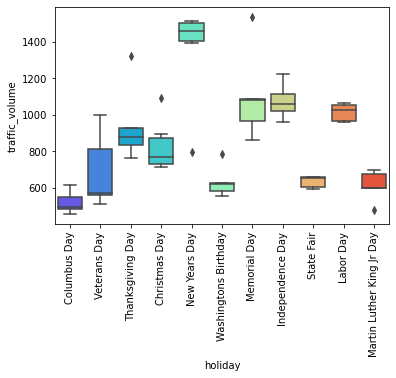

In [36]:
temp = metro_df[metro_df['holiday'] != 'None'][['traffic_volume', 'holiday']]
sns.boxplot(x='holiday', y="traffic_volume", data=temp ,palette='rainbow')
plt.xticks(rotation=90)

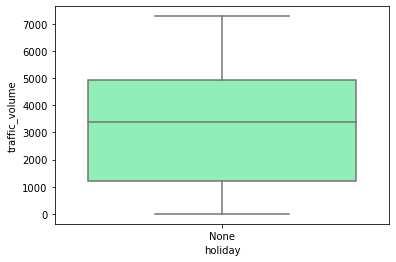

In [37]:
temp = metro_df[metro_df['holiday'] == 'None'][['traffic_volume', 'holiday']]
sns.boxplot(x='holiday', y="traffic_volume", data=temp ,palette='rainbow')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

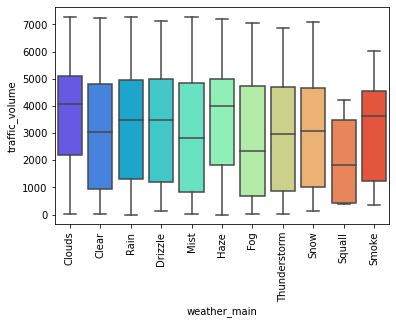

In [38]:
temp = metro_df[['traffic_volume', 'weather_main']]
sns.boxplot(x='weather_main', y="traffic_volume", data=temp ,palette='rainbow')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

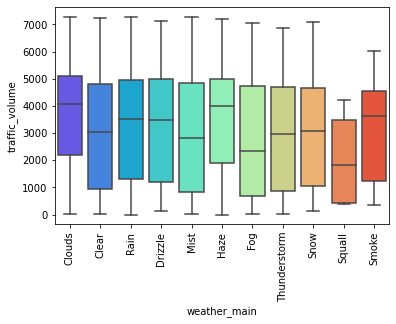

In [39]:
temp = metro_df[metro_df['holiday'] == 'None'][['traffic_volume', 'weather_main']]
sns.boxplot(x='weather_main', y="traffic_volume", data=temp ,palette='rainbow')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

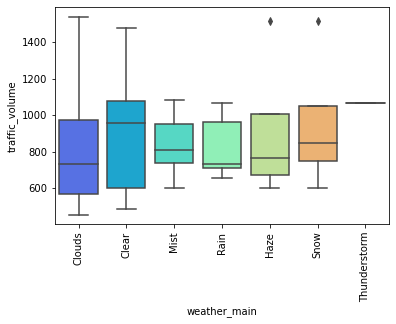

In [40]:
temp = metro_df[metro_df['holiday'] != 'None'][['traffic_volume', 'weather_main']]
sns.boxplot(x='weather_main', y="traffic_volume", data=temp ,palette='rainbow')
plt.xticks(rotation=90)

In [41]:
metro_df['rain_1h'].value_counts().sort_values()

2.11         1
2.78         1
1.47         1
12.45        1
2.18         1
         ...  
0.30       121
1.02       123
0.51       256
0.25       948
0.00     44737
Name: rain_1h, Length: 372, dtype: int64

In [42]:
metro_df['snow_1h'].value_counts().sort_values()

0.21        1
0.08        2
0.44        2
0.17        3
0.32        5
0.10        6
0.13        6
0.51        6
0.25        6
0.06       12
0.05       14
0.00    48141
Name: snow_1h, dtype: int64

In [42]:
metro_df['clouds_all'].value_counts().sort_values()

78         1
84         1
17         1
67         2
60         2
62         2
86         2
54         2
2          2
38         2
42         2
50         2
3          3
72         3
13         3
4          3
58         4
70         4
25         4
63         5
16         5
83         5
11         5
6          6
77         7
97         8
46         9
81        11
91        12
89        13
57        13
96        14
59        16
85        17
87        18
98        21
93        34
99        44
100       94
44       147
76       153
56       166
36       169
68       179
48       180
80       181
88       183
32       185
24       186
8        270
12       273
92       776
5       1094
64      1558
20      1849
0       1988
40      3993
75      5069
1      12761
90     16442
Name: clouds_all, dtype: int64

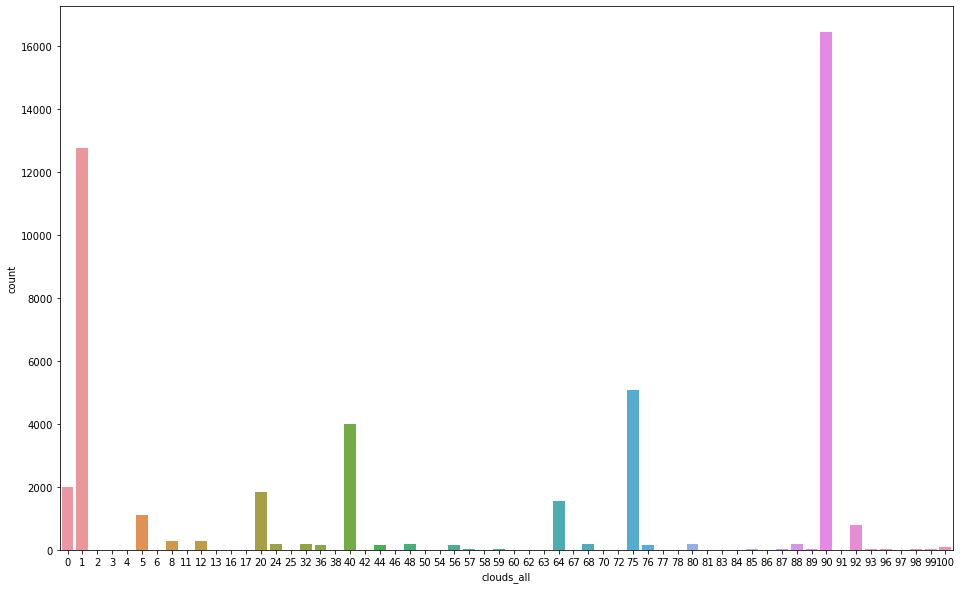

In [4]:
plt.figure(figsize = (16, 10))
sns.countplot(metro_df['clouds_all'])

In [44]:
metro_df['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [40]:
metro_df['weather_description'].value_counts().sort_values()

shower snow                                1
freezing rain                              2
thunderstorm with drizzle                  2
sleet                                      3
SQUALLS                                    4
light rain and snow                        6
shower drizzle                             6
light shower snow                         11
light intensity shower rain               13
proximity thunderstorm with drizzle       13
thunderstorm with light drizzle           15
very heavy rain                           18
smoke                                     20
thunderstorm with rain                    37
proximity thunderstorm with rain          52
thunderstorm with light rain              54
thunderstorm with heavy rain              63
heavy intensity drizzle                   64
thunderstorm                             125
proximity shower rain                    136
snow                                     293
heavy intensity rain                     467
heavy snow

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

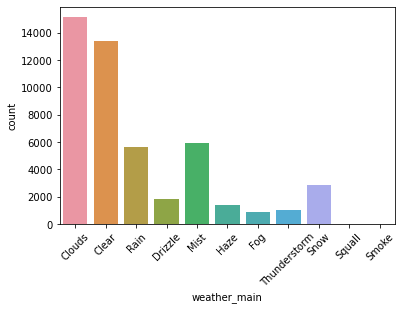

In [45]:
sns.countplot(metro_df['weather_main'])
plt.xticks(rotation=45)

In [46]:
metro_df['traffic_volume'].value_counts().sort_index()

0       2
1       7
2       7
3       9
5       6
       ..
7213    1
7217    1
7241    1
7260    2
7280    1
Name: traffic_volume, Length: 6704, dtype: int64

In [47]:
# The day Prince died - April 21, 2016
# https://www.youtube.com/watch?v=YSEBt0-A0zI
metro_df[metro_df['traffic_volume'] == 7260]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
22640,None,284.98,0.0,0.0,90,Mist,mist,2016-04-21 07:00:00,7260
22641,None,284.98,0.0,0.0,90,Rain,moderate rain,2016-04-21 07:00:00,7260


In [48]:
metro_df[metro_df['traffic_volume'] == 7241]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
22671,None,279.75,0.0,0.0,0,Clear,Sky is Clear,2016-04-22 07:00:00,7241


In [49]:
sum(metro_df['traffic_volume'] >= 7000)

61

In [50]:
metro_df[metro_df['traffic_volume'] >= 7100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
1189,None,278.02,0.0,0.0,75,Clouds,broken clouds,2012-11-14 16:00:00,7189
4926,None,277.53,0.0,0.0,90,Mist,mist,2013-04-09 07:00:00,7110
4927,None,277.53,0.0,0.0,90,Drizzle,drizzle,2013-04-09 07:00:00,7110
5225,None,275.07,0.0,0.0,90,Clouds,overcast clouds,2013-04-18 07:00:00,7150
5619,None,281.85,0.0,0.0,1,Clear,sky is clear,2013-04-30 07:00:00,7217
9686,None,269.72,0.0,0.0,64,Mist,mist,2013-11-07 07:00:00,7110
9998,None,279.50,0.0,0.0,75,Clouds,broken clouds,2013-11-20 07:00:00,7107
21502,None,273.15,0.0,0.0,90,Clouds,overcast clouds,2016-02-25 16:00:00,7118
22595,None,283.77,0.0,0.0,90,Haze,haze,2016-04-20 07:00:00,7192
22596,None,283.77,0.0,0.0,90,Mist,mist,2016-04-20 07:00:00,7192


Big *traffic_volume* related with the **weather**:

In [51]:
# This Was The Biggest April Snowstorm The Twin Cities Has Ever Seen
# https://www.mprnews.org/story/2018/04/15/travel-slowly-returns-to-normal-after-april-blizzard
metro_df[metro_df['traffic_volume'] == 7213]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
43158,None,282.0,0.0,0.0,75,Clouds,broken clouds,2018-04-12 16:00:00,7213


(0.0, 50.0)

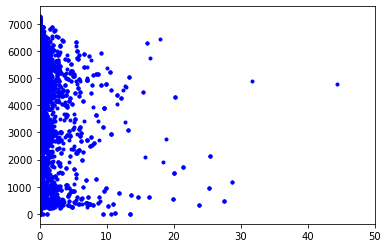

In [5]:
plt.plot(metro_df['rain_1h'], metro_df['traffic_volume'], 'b.')
plt.xlim(0, 50)

(0.0, 0.5)

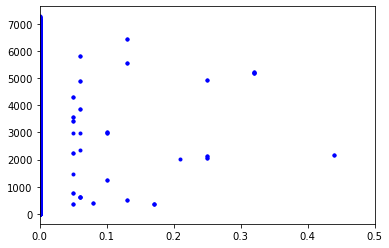

In [6]:
plt.plot(metro_df['snow_1h'], metro_df['traffic_volume'], 'b.')
plt.xlim(0, 0.5)

## 2. Converting the features

In [3]:
# copy the main data to not change it
df = metro_df.copy()

In [4]:
def traffic_sample(value):
    if (value >= 0) & (value <= 800):
        return 1
    elif (value > 800) & (value <= 1600):
        return 2
    elif (value > 1600) & (value <= 2400):
        return 3
    elif (value > 2400) & (value <= 3200):
        return 4
    elif (value > 3200) & (value <= 4000):
        return 5
    elif (value > 4000) & (value <= 4800):
        return 6
    elif (value > 4800) & (value <= 5600):
        return 7
    elif (value > 5600) & (value <= 6400):
        return 8
    else:
        return 9

In [5]:
df['sampled_traffic'] = df['traffic_volume'].apply(traffic_sample)

In [6]:
weather_map = {'Clouds':0, 'Clear':1, 'Rain':2, 'Drizzle':3, 'Mist':4, 'Haze':5, 'Fog':6,
       'Thunderstorm':7, 'Snow':8, 'Squall':9, 'Smoke':10}

In [7]:
df['int_cat_weather'] = df['weather_main'].apply(lambda x: weather_map[x]) 

In [8]:
mean_temp = df['temp'].mean()
df['temp_in_celsius'] = df['temp'].apply(lambda x: x - 273.15 if x != 0 else mean_temp - 273.15)

In [9]:
rain_1h_mean = df['rain_1h'].mean()
df['rain_1h'] = df['rain_1h'].apply(lambda x: rain_1h_mean if x == 9831.3 else x )

In [61]:
df['temp_in_celsius'].describe()

count    48204.000000
mean         8.114207
std         12.708268
min        -29.760000
25%         -0.960000
50%          9.300000
75%         18.656000
max         36.920000
Name: temp_in_celsius, dtype: float64

In [62]:
df['int_cat_weather'].value_counts()

0     15164
1     13391
4      5950
2      5672
8      2876
3      1821
5      1360
7      1034
6       912
10       20
9         4
Name: int_cat_weather, dtype: int64

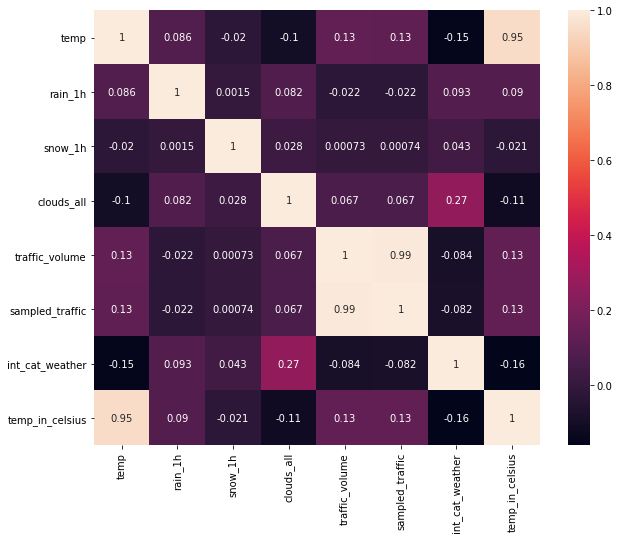

In [145]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)

/Users/macbook/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


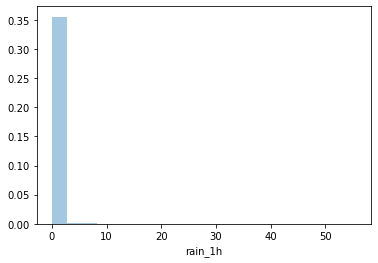

In [92]:
sns.distplot(df['rain_1h'], bins = 20)

/Users/macbook/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


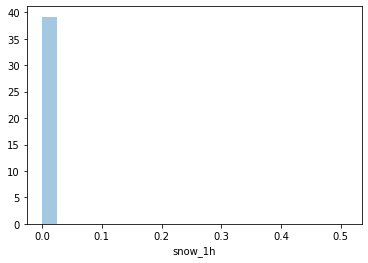

In [93]:
sns.distplot(df['snow_1h'], bins = 20)

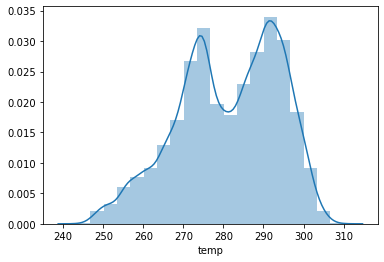

In [94]:
sns.distplot(df['temp'], bins = 20)

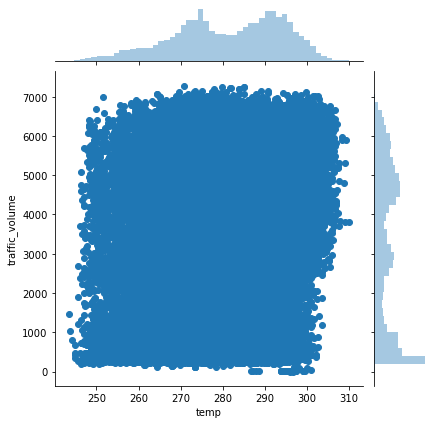

In [95]:
sns.jointplot('temp', 'traffic_volume', data=df)

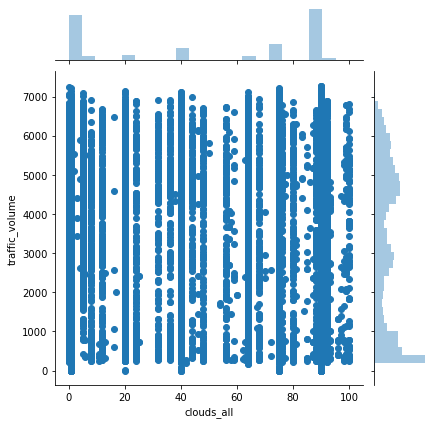

In [64]:
sns.jointplot('clouds_all', 'traffic_volume', data=df)

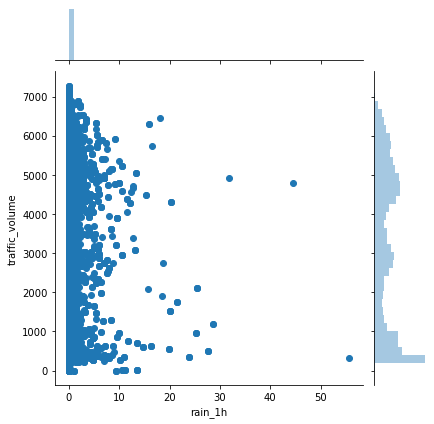

In [65]:
sns.jointplot('rain_1h', 'traffic_volume', data=df)

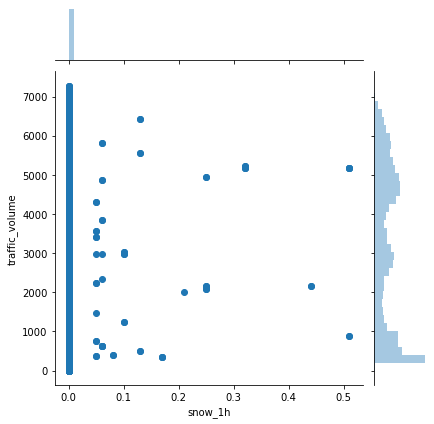

In [66]:
sns.jointplot('snow_1h', 'traffic_volume', data=df)

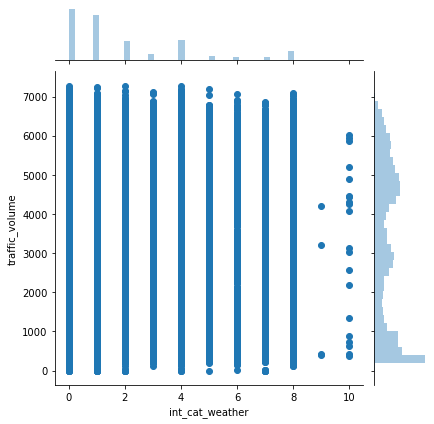

In [67]:
sns.jointplot('int_cat_weather', 'traffic_volume', data=df)

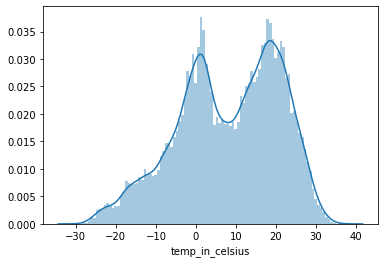

In [68]:
sns.distplot(df['temp_in_celsius'], bins = 100)

In [10]:
# outliers in temperaure (K)
df['temp'] = df['temp'].apply(lambda x: 255.71 if x == 0 else x)

In [11]:
# 'Sky is Clear' = 'sky is clear'
metro_df['weather_description'] = metro_df['weather_description'].apply(lambda x: 'sky is clear' if x == 'Sky is Clear' else x)

In [12]:
# Standard form
df['weather_description'] = df['weather_description'].apply(lambda x: 'squalls' if x == 'SQUALLS' else x)

(-40.0, 50.0)

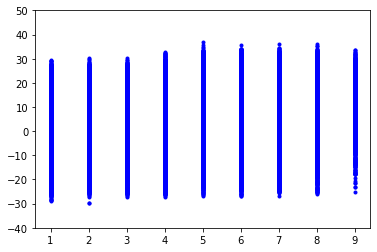

In [72]:
plt.plot(df['sampled_traffic'], df['temp_in_celsius'], 'b.')
plt.ylim(-40, 50)

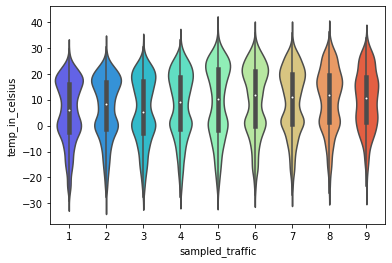

In [73]:
sns.violinplot(x="sampled_traffic", y="temp_in_celsius", data = df,palette='rainbow')

In [74]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,sampled_traffic,int_cat_weather,temp_in_celsius
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,7,0,15.13
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,6,0,16.21
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,6,0,16.43
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,7,0,16.98
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,7,0,17.99


In [76]:
corr_matrix = df.corr()

In [77]:
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
temp               0.132623
temp_in_celsius    0.132272
clouds_all         0.067054
snow_1h            0.000733
rain_1h           -0.022347
int_cat_weather   -0.083979
Name: traffic_volume, dtype: float64

In [17]:
temp = df[['weather_description', 'traffic_volume']]

In [18]:
temp['weather_description'] = temp['weather_description'].apply(lambda x: x.split('rain') if x.split()[-1] == 'rain' else 'none')

<ipython-input-18-07f4628a962c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['weather_description'] = temp['weather_description'].apply(lambda x: x.split('rain') if x.split()[-1] == 'rain' else 'none')


In [19]:
temp = temp[temp['weather_description'] != 'none'][['weather_description','traffic_volume']]

In [20]:
temp.head()

,weather_description,traffic_volume
164,"[light , ]",5777
178,"[light , ]",6793
180,"[light , ]",6283
182,"[light , ]",5680
220,"[light , ]",739


In [21]:
temp['weather_description'].iloc[0][0]

'light '

In [22]:
temp['weather_description'] = temp['weather_description'].apply(lambda x: x[0])

In [23]:
temp['weather_description'].value_counts()

light                           3372
moderate                        1664
heavy intensity                  467
proximity shower                 136
thunderstorm with heavy           63
thunderstorm with light           54
proximity thunderstorm with       52
thunderstorm with                 37
very heavy                        18
light intensity shower            13
freezing                           2
Name: weather_description, dtype: int64

In [255]:
metro_df['weather_description'].value_counts()

sky is clear                           13391
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thunderstorm with light rain              54
proximity 

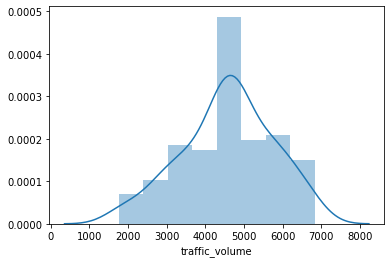

In [258]:
sns.distplot(metro_df[metro_df['weather_description'] == 'proximity shower rain']['traffic_volume'])

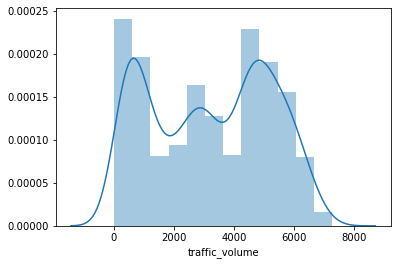

In [260]:
sns.distplot(metro_df[metro_df['weather_description'] == 'moderate rain']['traffic_volume'])

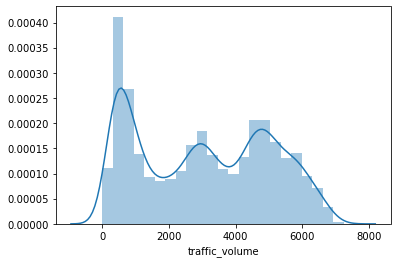

In [259]:
sns.distplot(metro_df[metro_df['weather_description'] == 'sky is clear']['traffic_volume'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

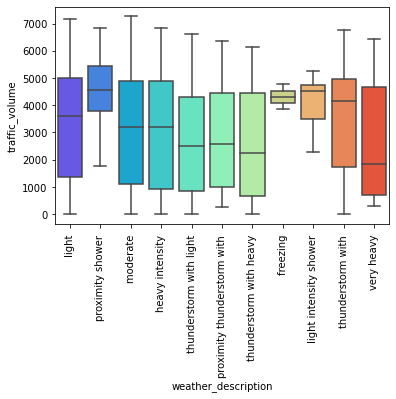

In [254]:
sns.boxplot(x='weather_description', y="traffic_volume", data=temp ,palette='rainbow')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

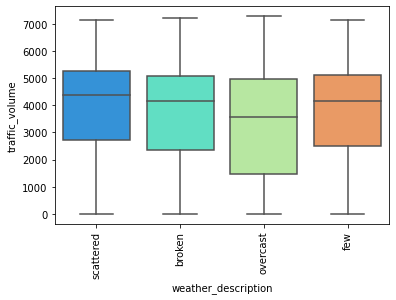

In [156]:
sns.boxplot(x='weather_description', y="traffic_volume", data=temp ,palette='rainbow')
plt.xticks(rotation=90)

In [100]:
temp_str.split()[0].split('-')

['2012', '10', '02']

In [13]:
def get_season(x):
    month = x.split()[0].split('-')[1]
    if (month == '03') | (month == '04') | (month == '05'):
        return 'Spring'
    elif (month == '06') | (month == '07') | (month == '08'):
        return 'Summer'
    elif (month == '09') | (month == '10') | (month == '11'):
        return 'Autumn'
    else:
        return 'Winter'

In [14]:
df['seasons'] = df['date_time'].apply(get_season)

In [16]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,sampled_traffic,int_cat_weather,temp_in_celsius,seasons
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,7,0,15.13,Autumn
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,6,0,16.21,Autumn
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,6,0,16.43,Autumn
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,7,0,16.98,Autumn
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,7,0,17.99,Autumn


In [17]:
pd.get_dummies(df['seasons'])

,Autumn,Spring,Summer,Winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
48199,1,0,0,0
48200,1,0,0,0
48201,1,0,0,0
48202,1,0,0,0


In [27]:
df['seasons'].value_counts()

Summer    12945
Spring    12488
Winter    11781
Autumn    10990
Name: seasons, dtype: int64

In [118]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,sampled_traffic,int_cat_weather,temp_in_celsius,seasons
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,7,0,15.13,Autumn
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,6,0,16.21,Autumn
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,6,0,16.43,Autumn
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,7,0,16.98,Autumn
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,7,0,17.99,Autumn


In [170]:
df.head(-1)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,sampled_traffic,int_cat_weather,temp_in_celsius,seasons,Autumn,Spring,Summer,Winter,composed_clouds
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,7,0,15.13,Autumn,1,0,0,0,45
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,6,0,16.21,Autumn,1,0,0,0,45
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,6,0,16.43,Autumn,1,0,0,0,90
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,7,0,16.98,Autumn,1,0,0,0,90
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,7,0,17.99,Autumn,1,0,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947,5,2,11.05,Autumn,1,0,0,0,45
48199,None,283.45,0.00,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,5,0,10.30,Autumn,1,0,0,0,45
48200,None,282.76,0.00,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,4,0,9.61,Autumn,1,0,0,0,90
48201,None,282.73,0.00,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,3,7,9.58,Autumn,1,0,0,0,90


In [15]:
df = pd.concat([df, pd.get_dummies(df['seasons'])], axis=1)

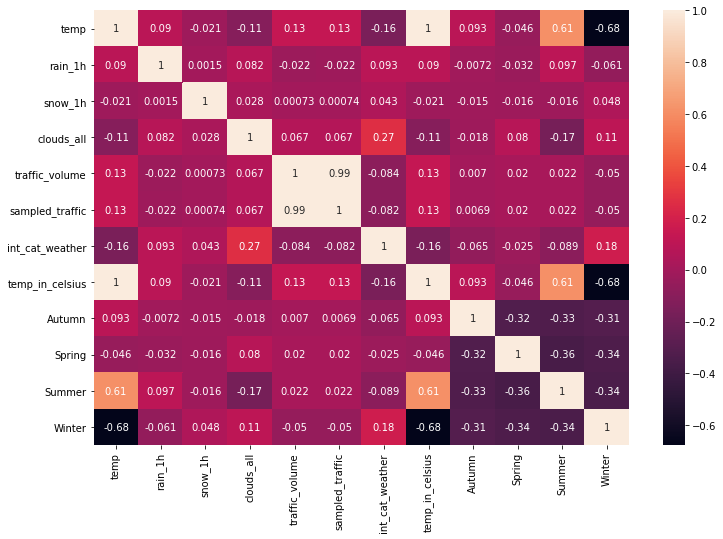

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [135]:
corr_matrix = df.corr()

In [136]:
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
temp               0.132623
temp_in_celsius    0.132272
clouds_all         0.067054
Summer             0.021879
Spring             0.020172
Autumn             0.006972
snow_1h            0.000733
rain_1h           -0.022347
Winter            -0.049937
int_cat_weather   -0.083979
Name: traffic_volume, dtype: float64

In [163]:
pd.get_dummies(df['weather_main'])

,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48199,0,1,0,0,0,0,0,0,0,0,0
48200,0,1,0,0,0,0,0,0,0,0,0
48201,0,0,0,0,0,0,0,0,0,0,1
48202,0,1,0,0,0,0,0,0,0,0,0


In [165]:
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
temp               0.132623
temp_in_celsius    0.132272
Clouds             0.122285
clouds_all         0.067054
Summer             0.021879
Haze               0.020778
Spring             0.020172
Rain               0.010676
Autumn             0.006972
Drizzle            0.003082
snow_1h            0.000733
Smoke             -0.000227
Squall            -0.005493
Thunderstorm      -0.019241
rain_1h           -0.022347
Snow              -0.030804
Fog               -0.038868
Winter            -0.049937
Mist              -0.061734
Clear             -0.063652
int_cat_weather   -0.083979
Name: traffic_volume, dtype: float64

In [16]:
df['composed_clouds'] = df['clouds_all'].apply(lambda x: 45 if (x >= 2) & (x <= 89) else x)

In [167]:
df['composed_clouds'].value_counts()

90     16442
45     16010
1      12761
0       1988
92       776
100       94
99        44
93        34
98        21
96        14
91        12
97         8
Name: composed_clouds, dtype: int64

In [17]:
corr_matrix = pd.concat([df, pd.get_dummies(df['weather_main'])], axis=1).corr()

In [169]:
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
temp               0.132623
temp_in_celsius    0.132272
Clouds             0.122285
composed_clouds    0.074985
clouds_all         0.067054
Summer             0.021879
Haze               0.020778
Spring             0.020172
Rain               0.010676
Autumn             0.006972
Drizzle            0.003082
snow_1h            0.000733
Smoke             -0.000227
Squall            -0.005493
Thunderstorm      -0.019241
rain_1h           -0.022347
Snow              -0.030804
Fog               -0.038868
Winter            -0.049937
Mist              -0.061734
Clear             -0.063652
int_cat_weather   -0.083979
Name: traffic_volume, dtype: float64

In [18]:
s = pd.date_range('2012-10-02', '2018-09-30', freq='D').to_series()
date = s.dt.dayofweek

In [19]:
date.index

DatetimeIndex(['2012-10-02', '2012-10-03', '2012-10-04', '2012-10-05',
               '2012-10-06', '2012-10-07', '2012-10-08', '2012-10-09',
               '2012-10-10', '2012-10-11',
               ...
               '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24',
               '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
               '2018-09-29', '2018-09-30'],
              dtype='datetime64[ns]', length=2190, freq='D')

In [20]:
df['day_of_week'] = df['date_time'].apply(lambda x: date[x.split()[0]])

In [31]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,sampled_traffic,int_cat_weather,temp_in_celsius,seasons,day_of_week
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,7,0,15.13,Autumn,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,6,0,16.21,Autumn,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,6,0,16.43,Autumn,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,7,0,16.98,Autumn,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,7,0,17.99,Autumn,1


In [192]:
df['day_of_week'].value_counts()

0    7072
2    6930
6    6872
1    6846
4    6836
5    6831
3    6817
Name: day_of_week, dtype: int64

Determine the **weekends of week** in the dataset:

In [21]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 0 if (x >= 0) & (x <= 4) else 1)

In [33]:
df['is_weekend'].value_counts()

0    34501
1    13703
Name: is_weekend, dtype: int64

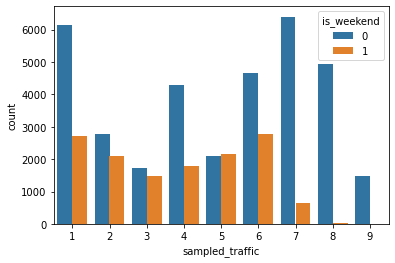

In [63]:
sns.countplot('sampled_traffic', hue='is_weekend', data=df)

In [47]:
df.head(24)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,sampled_traffic,int_cat_weather,temp_in_celsius,seasons,day_of_week,is_weekend,is_holiday,is_peak_hs
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,7,0,15.13,Autumn,1,0,False,False
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,6,0,16.21,Autumn,1,0,False,False
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,6,0,16.43,Autumn,1,0,False,False
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,7,0,16.98,Autumn,1,0,False,False
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,7,0,17.99,Autumn,1,0,False,False
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,7,1,18.57,Autumn,1,0,False,False
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584,7,1,20.02,Autumn,1,0,False,False
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015,8,1,20.71,Autumn,1,0,False,False
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791,8,0,20.99,Autumn,1,0,False,False
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770,6,0,19.95,Autumn,1,0,False,False


In [200]:
corr_matrix = df.corr()
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
temp               0.132623
temp_in_celsius    0.132272
composed_clouds    0.074985
clouds_all         0.067054
Summer             0.021879
Spring             0.020172
Autumn             0.006972
snow_1h            0.000733
rain_1h           -0.022347
Winter            -0.049937
int_cat_weather   -0.083979
day_of_week       -0.149544
is_weekend        -0.218647
Name: traffic_volume, dtype: float64

In [261]:
corr_matrix = pd.concat([df, pd.get_dummies(df['weather_main'])], axis=1).corr()
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
temp               0.132623
temp_in_celsius    0.132272
Clouds             0.122285
composed_clouds    0.074985
clouds_all         0.067054
Summer             0.021879
Haze               0.020778
Spring             0.020172
Rain               0.010676
Autumn             0.006972
Drizzle            0.003082
snow_1h            0.000733
Smoke             -0.000227
Squall            -0.005493
Thunderstorm      -0.019241
rain_1h           -0.022347
Snow              -0.030804
Fog               -0.038868
Winter            -0.049937
Mist              -0.061734
Clear             -0.063652
int_cat_weather   -0.083979
day_of_week       -0.149544
is_weekend        -0.218647
Name: traffic_volume, dtype: float64

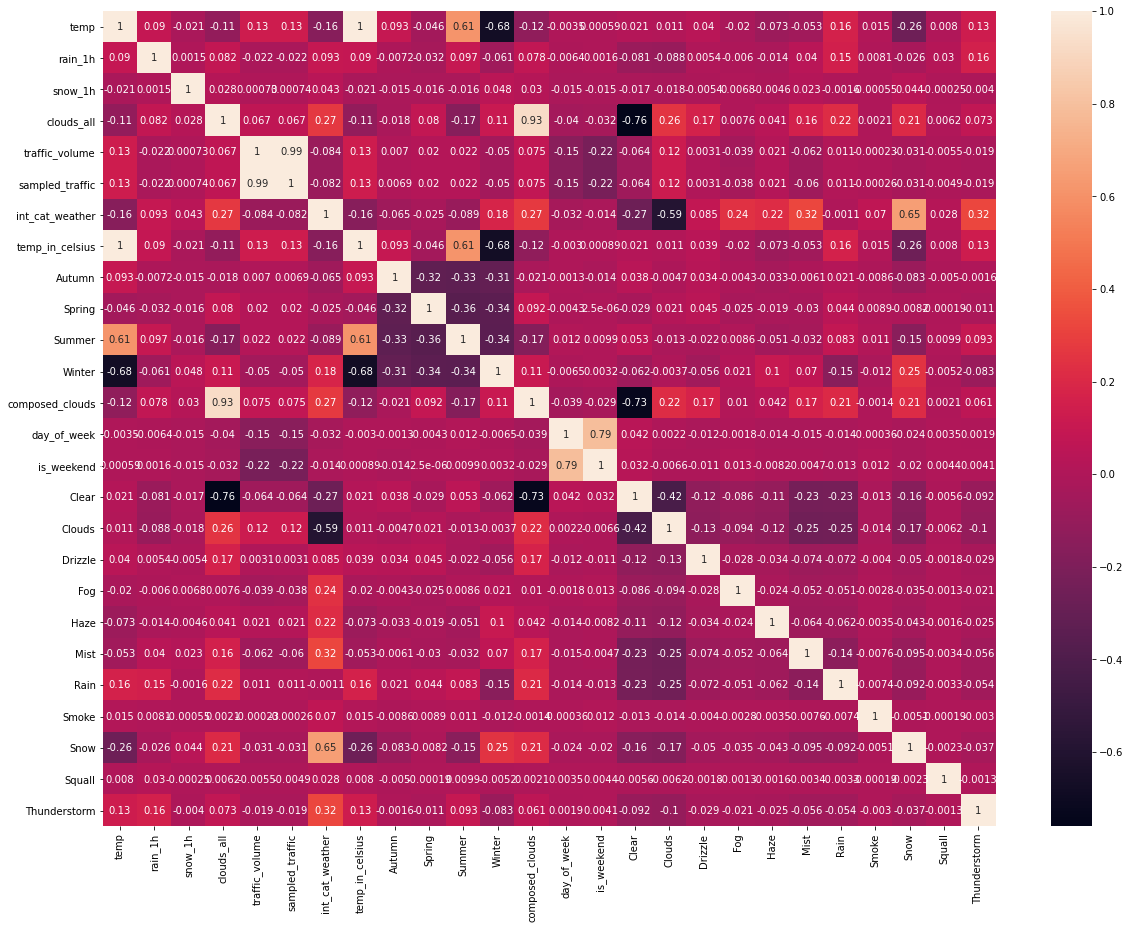

In [263]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_matrix, annot = True)

In [22]:
df['is_holiday'] = df['holiday'].apply(lambda x: True if x != 'None' else False)

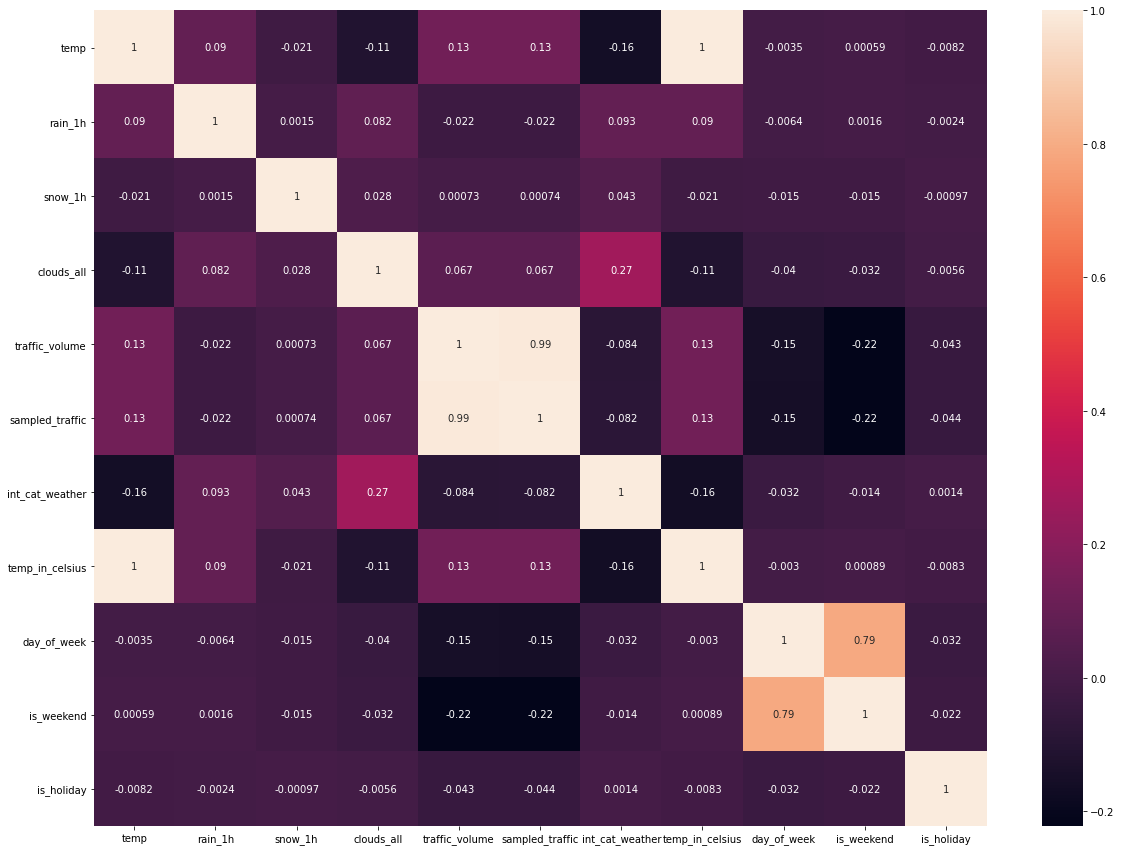

In [35]:
plt.figure(figsize = (20,15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

In [65]:
int(df['date_time'].iloc[0].split()[0].split('-')[0])

2012

Determine the **peak hours** in the dataset:

In [23]:
def is_peak_h(x):
    isPeak = x.split()[-1].split(':')[0]
    if (isPeak == '07') | (isPeak == '08') | (isPeak == '09'):
        return True
    elif (isPeak == '16') | (isPeak == '17') | (isPeak == '18'):
        return True
    else:
        return False

In [24]:
df['is_peak_hs'] = df['date_time'].apply(is_peak_h)

In [50]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,sampled_traffic,int_cat_weather,temp_in_celsius,seasons,day_of_week,is_weekend,is_holiday,is_peak_hs
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,7,0,15.13,Autumn,1,0,False,True
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,6,0,16.21,Autumn,1,0,False,False
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,6,0,16.43,Autumn,1,0,False,False
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,7,0,16.98,Autumn,1,0,False,False
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,7,0,17.99,Autumn,1,0,False,False


In [51]:
corr_matrix = df.corr()
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
is_peak_hs         0.454030
temp               0.132623
temp_in_celsius    0.132272
clouds_all         0.067054
snow_1h            0.000733
rain_1h           -0.022347
is_holiday        -0.042897
int_cat_weather   -0.083979
day_of_week       -0.149544
is_weekend        -0.218647
Name: traffic_volume, dtype: float64

Wow! That is seems good! We can see that pick hours is positive corr with traffic_volume

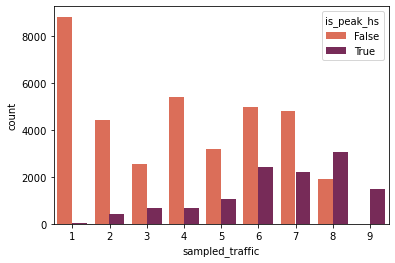

In [86]:
sns.countplot('sampled_traffic', hue='is_peak_hs', data=df, palette='rocket_r')

In [25]:
def is_day(x):
    isPeak = int(x.split()[-1].split(':')[0])
    if (isPeak >= 6) & (isPeak <= 17):
        return True
    else:
        return False

In [26]:
df['is_day'] = df['date_time'].apply(is_day)

In [30]:
corr_matrix = df.corr()
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
is_day             0.745789
is_peak_hs         0.454030
temp               0.132623
temp_in_celsius    0.132272
clouds_all         0.067054
Summer             0.021879
Spring             0.020172
Autumn             0.006972
snow_1h            0.000733
rain_1h           -0.022347
is_holiday        -0.042897
Winter            -0.049937
int_cat_weather   -0.083979
day_of_week       -0.149544
is_weekend        -0.218647
Name: traffic_volume, dtype: float64

In [59]:
corr_matrix['is_day'].sort_values(ascending=False)

is_day             1.000000
traffic_volume     0.745789
sampled_traffic    0.742731
is_peak_hs         0.391264
clouds_all         0.078238
temp               0.041151
temp_in_celsius    0.041087
snow_1h            0.003239
is_weekend         0.002736
day_of_week        0.001678
rain_1h           -0.000787
int_cat_weather   -0.014780
is_holiday        -0.035413
Name: is_day, dtype: float64

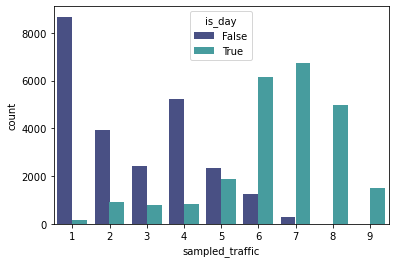

In [84]:
sns.countplot('sampled_traffic', hue='is_day', data=df, palette='mako')

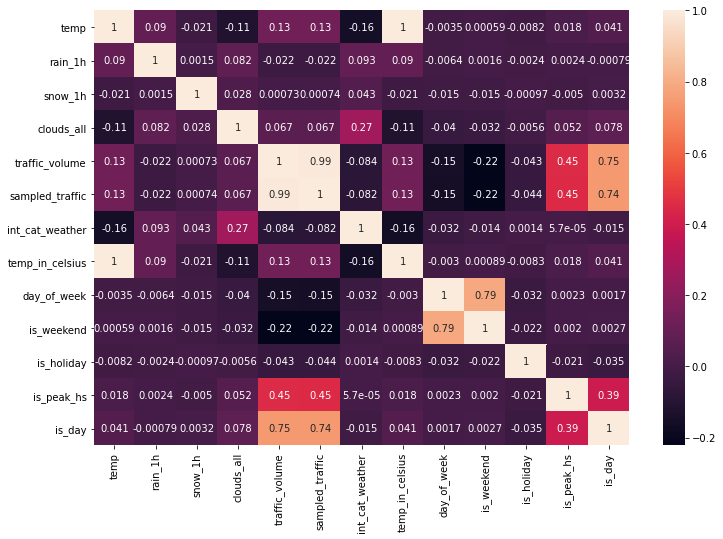

In [62]:
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot = True)

Let's consider the *leap year* to look at the weather in it

In [27]:
def is_leap(x):
    isLeap = int(x.split()[0].split('-')[0])
    if isLeap % 4 != 0:
        return False
    elif isLeap % 100 != 0:
        return True
    elif isLeap % 400 != 0:
        return False
    else: return True

In [28]:
df['is_leap'] = df['date_time'].apply(is_leap)

In [70]:
corr_matrix = df.corr()
corr_matrix['int_cat_weather'].sort_values(ascending=False)

int_cat_weather    1.000000
clouds_all         0.265164
rain_1h            0.092634
snow_1h            0.043336
is_leap            0.017723
is_holiday         0.001405
is_peak_hs         0.000057
is_weekend        -0.014168
is_day            -0.014780
day_of_week       -0.032037
sampled_traffic   -0.082438
traffic_volume    -0.083979
temp              -0.159542
temp_in_celsius   -0.159790
Name: int_cat_weather, dtype: float64

In [71]:
corr_matrix['is_leap'].sort_values(ascending=False)

is_leap            1.000000
clouds_all         0.041906
int_cat_weather    0.017723
day_of_week        0.007760
is_weekend         0.004391
is_holiday         0.002690
is_day             0.001832
snow_1h            0.001364
is_peak_hs        -0.002042
rain_1h           -0.013220
temp              -0.016268
temp_in_celsius   -0.016513
sampled_traffic   -0.023190
traffic_volume    -0.023613
Name: is_leap, dtype: float64

Nothing interesting with the leap year

#### Transform the 'weather_main' attribute

In [96]:
df['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

Transform the *weather_main* to number using **catboost's** formula:

$ avgTarget = \frac{countInClass + prior}{totalCount+1} $

prior = 17

Clouds - 0.3149 <br>
Clear - 0.2781 <br>
Mist - 0.1237 <br>
Rain - 0.1177 <br>
Snow - 0.06 <br>
Drizzle - 0.0381 <br>
Haze - 0.0273 <br>
Thunderstorm - 0.0218 <br>
Fog - 0.01927 <br>
Smoke - 0.0007675 <br>
Squall - 0.0004356 <br>

In [29]:
weather_map = {'Clouds': 0.3149, 'Clear': 0.2781, 'Mist': 0.1237, 'Rain': 0.1177, 'Snow': 0.06, 'Drizzle': 0.0381,
              'Haze': 0.0273, 'Thunderstorm' : 0.0218, 'Fog' : 0.01927, 'Smoke' : 0.0007675, 'Squall': 0.0004356}

In [30]:
df['avg_weather'] = df['weather_main'].apply(lambda x: weather_map[x])

In [121]:
corr_matrix = df.corr()
corr_matrix['avg_weather'].sort_values(ascending=False)

avg_weather        1.000000
traffic_volume     0.068527
sampled_traffic    0.066868
temp_in_celsius    0.045434
temp               0.045160
day_of_week        0.036185
is_weekend         0.018150
is_day             0.010086
is_holiday         0.001158
is_peak_hs        -0.005725
is_leap           -0.007335
snow_1h           -0.031125
rain_1h           -0.143521
clouds_all        -0.354103
composed_clouds   -0.360957
int_cat_weather   -0.875634
Name: avg_weather, dtype: float64

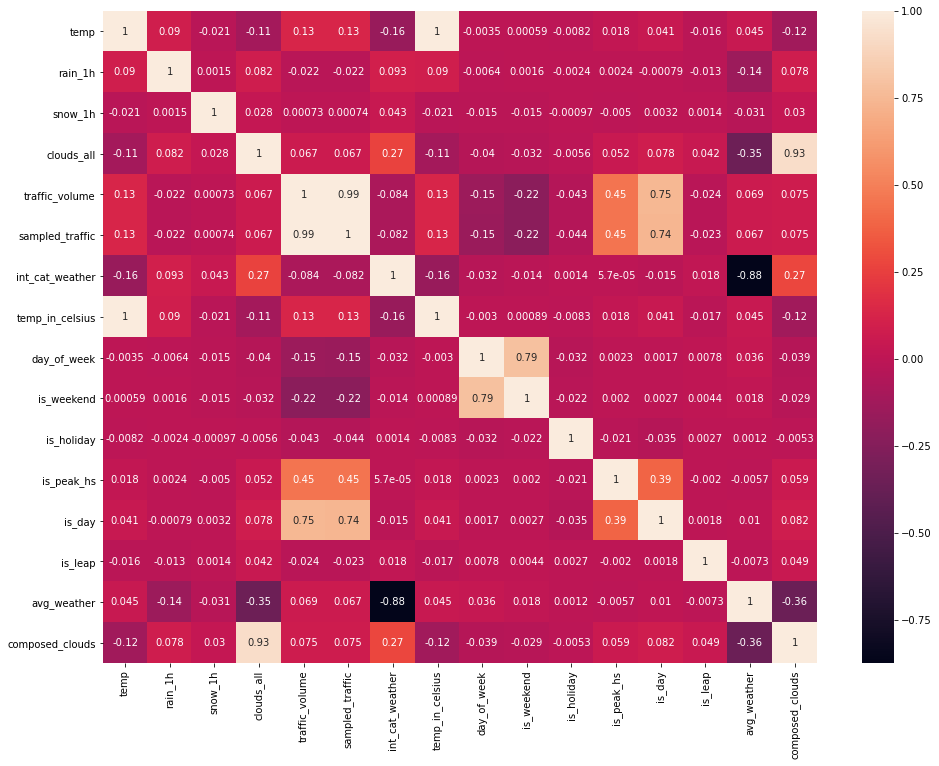

In [122]:
plt.figure(figsize = (16, 12))
sns.heatmap(corr_matrix, annot = True)

In [35]:
corr_matrix = pd.concat([df, pd.get_dummies(df['weather_main'])], axis=1).drop(['is_weekend',
                                                                               'is_holiday',
                                                                               'is_peak_hs',
                                                                               'temp_in_celsius',
                                                                               'is_day',
                                                                               'is_leap',
                                                                               'sampled_traffic',
                                                                               'day_of_week'
                                                                               ], axis=1).corr()

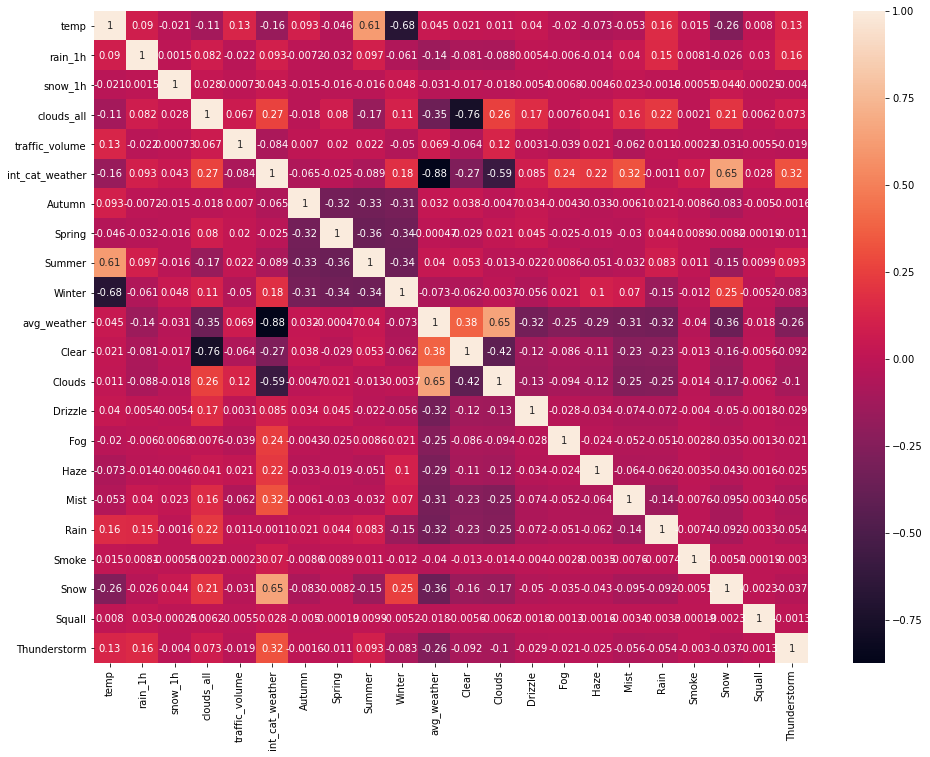

In [36]:
plt.figure(figsize = (16, 12))
sns.heatmap(corr_matrix, annot = True)

From here we can conclude that *avg_weather* show the whole percentage of the *weather_main* and it is representable of it. Although, we see my handmade *int_cat_weather* is not correct correlated.

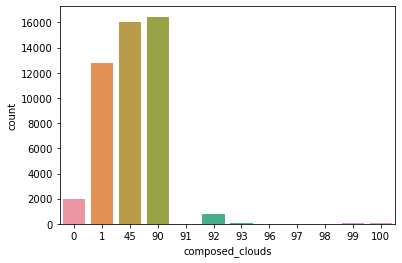

In [39]:
sns.countplot(df['composed_clouds'])

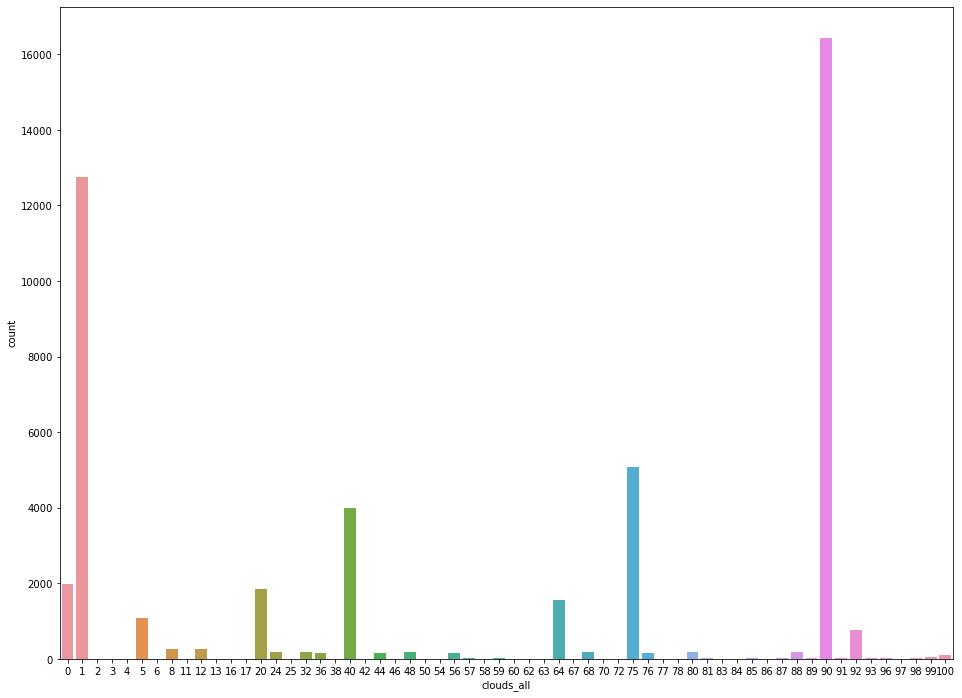

In [127]:
plt.figure(figsize = (16, 12))
sns.countplot(df['clouds_all'])

In [126]:
df['clouds_all'].value_counts().sort_index()

0       1988
1      12761
2          2
3          3
4          3
5       1094
6          6
8        270
11         5
12       273
13         3
16         5
17         1
20      1849
24       186
25         4
32       185
36       169
38         2
40      3993
42         2
44       147
46         9
48       180
50         2
54         2
56       166
57        13
58         4
59        16
60         2
62         2
63         5
64      1558
67         2
68       179
70         4
72         3
75      5069
76       153
77         7
78         1
80       181
81        11
83         5
84         1
85        17
86         2
87        18
88       183
89        13
90     16442
91        12
92       776
93        34
96        14
97         8
98        21
99        44
100       94
Name: clouds_all, dtype: int64

In [31]:
def sample_clouds(x):
    if (x >= 2) & (x <= 38):
        return 20
    elif (x >= 42) & (x <= 72):
        return 57
    elif (x >= 75) & (x <= 89):
        return 82
    elif (x >= 91) & (x <= 100):
        return 96
    else: return x

In [32]:
df['composed_clouds'] = df['clouds_all'].apply(sample_clouds)

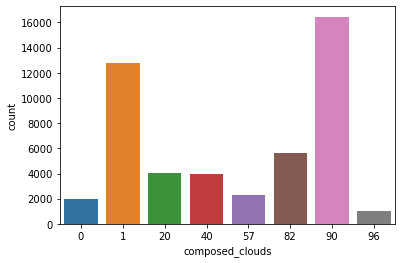

In [42]:
sns.countplot(df['composed_clouds'])

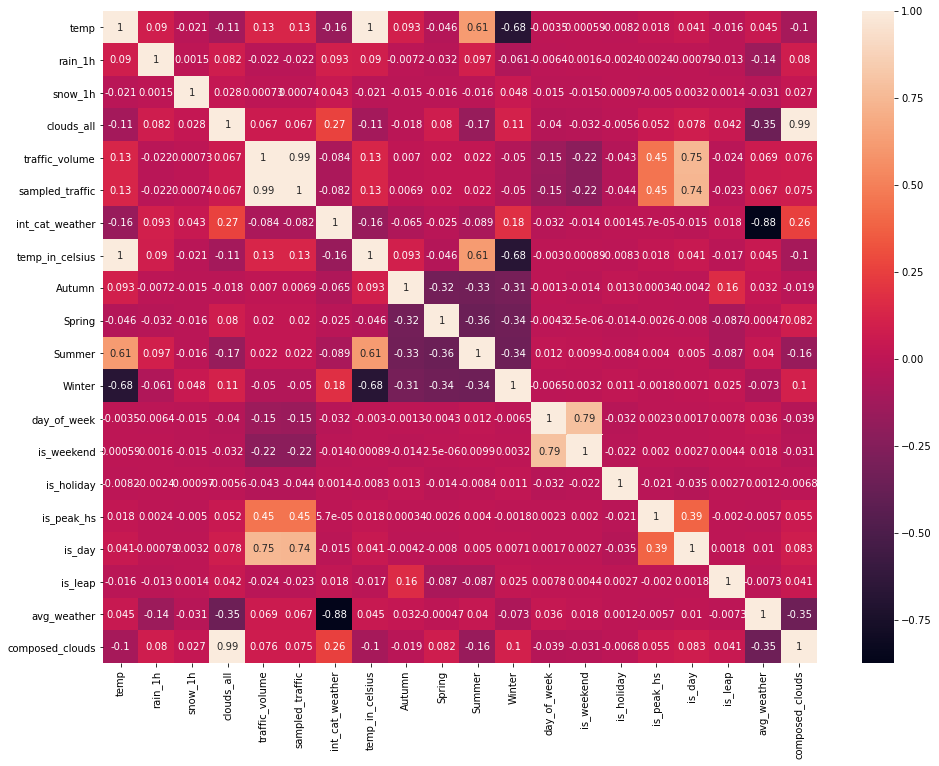

In [44]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)

## 3. Extract all of the good features from the exploring

In [120]:
corr_matrix = df.corr()
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
is_day             0.745789
is_peak_hs         0.454030
temp               0.132623
temp_in_celsius    0.132272
composed_clouds    0.074985
avg_weather        0.068527
clouds_all         0.067054
snow_1h            0.000733
rain_1h           -0.022347
is_leap           -0.023613
is_holiday        -0.042897
int_cat_weather   -0.083979
day_of_week       -0.149544
is_weekend        -0.218647
Name: traffic_volume, dtype: float64

In [46]:
corr_matrix = df.corr()
corr_matrix['traffic_volume'].sort_values(ascending=False)

traffic_volume     1.000000
sampled_traffic    0.993856
is_day             0.745789
is_peak_hs         0.454030
temp               0.132623
temp_in_celsius    0.132272
composed_clouds    0.075580
avg_weather        0.068527
clouds_all         0.067054
Summer             0.021879
Spring             0.020172
Autumn             0.006972
snow_1h            0.000733
rain_1h           -0.022347
is_leap           -0.023613
is_holiday        -0.042897
Winter            -0.049937
int_cat_weather   -0.083979
day_of_week       -0.149544
is_weekend        -0.218647
Name: traffic_volume, dtype: float64

In [45]:
metro_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [33]:
fdf = df[['is_day', 'is_peak_hs', 'temp', 'composed_clouds', 'avg_weather', 'is_weekend', 'traffic_volume']]

Here *seasons* in question mark, next we look at them seperately

In [34]:
fdf.head()

,is_day,is_peak_hs,temp,composed_clouds,avg_weather,is_weekend,traffic_volume
0,True,True,288.28,40,0.3149,0,5545
1,True,False,289.36,82,0.3149,0,4516
2,True,False,289.58,90,0.3149,0,4767
3,True,False,290.13,90,0.3149,0,5026
4,True,False,291.14,82,0.3149,0,4918


## 4. Training the model

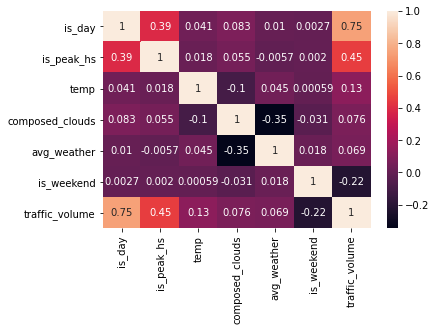

In [122]:
sns.heatmap(fdf.corr(), annot=True)

In [35]:
X = fdf.drop('traffic_volume', axis=1)
y = fdf.traffic_volume

In [37]:
X.head()

,is_day,is_peak_hs,temp,composed_clouds,avg_weather,is_weekend
0,True,True,288.28,40,0.3149,0
1,True,False,289.36,82,0.3149,0
2,True,False,289.58,90,0.3149,0
3,True,False,290.13,90,0.3149,0
4,True,False,291.14,82,0.3149,0


In [38]:
y.head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

### 4.1 Feature scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [38]:
X.set_axis(fdf.drop('traffic_volume', axis=1).columns, axis=1, inplace=True)

In [100]:
X.head()

,is_day,is_peak_hs,temp,composed_clouds,avg_weather,is_weekend
0,1.0,1.0,0.673215,0.416667,1.0,0.0
1,1.0,0.0,0.689412,0.854167,1.0,0.0
2,1.0,0.0,0.692711,0.937500,1.0,0.0
3,1.0,0.0,0.700960,0.937500,1.0,0.0
4,1.0,0.0,0.716107,0.854167,1.0,0.0


### 4.2 Split the data to train and test

In [42]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

### 4.3 Train the model

#### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [144]:
model.fit(X_train, y_train)

LinearRegression()

In [145]:
print(model.coef_, model.intercept_)

[ 2.63397322e+03  8.78740176e+02  1.58825979e+01  1.96736116e+00
  1.41001010e+03 -9.79339438e+02] -2863.8081480406872


In [105]:
y_pred = model.predict(X_test)

#### Polynomial Regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
poly_features = PolynomialFeatures(degree=7, include_bias=False)
Xp_train = poly_features.fit_transform(X_train)
Xp_test=poly_features.fit_transform(X_test)

In [74]:
model.fit(Xp_train, y_train)

LinearRegression()

In [75]:
print(model.coef_, model.intercept_)

[ 1.74784637e+15 -1.27441791e+14 -8.22493438e+04 ...  2.48007643e+11
  2.39023109e+11  6.74835285e+10] 11255.465731400565


In [76]:
yp_pred = model.predict(Xp_test)

#### Lasso Regression

In [42]:
from sklearn.linear_model import Lasso

In [43]:
lasso_model = Lasso()

In [44]:
lasso_model.fit(X_train, y_train)

Lasso()

In [45]:
print(lasso_model.coef_, lasso_model.intercept_)

[2632.56699793  874.77299154 1030.48289425  178.4268456   431.11470839
 -974.52311841] 1032.7719650187096


In [47]:
y_pred = lasso_model.predict(X_test)

#### Elastic Net

In [79]:
from sklearn.linear_model import ElasticNet

In [87]:
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [88]:
elastic_model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [89]:
print(elastic_model.coef_, elastic_model.intercept_)

[2214.30499228  850.10720198  463.6314283   130.57573679  305.05379922
 -784.14245044] 1624.6989052898266


In [90]:
y_pred = elastic_model.predict(X_test)

#### SVM Regression

In [95]:
from sklearn.svm import SVR

In [96]:
svr_model = SVR(kernel="poly", degree=4, C=100, epsilon=0.1)

In [97]:
svr_model.fit(X_train, y_train)

SVR(C=100, degree=4, kernel='poly')

**Note** Это занело примерно 30 секунд

In [99]:
y_pred = svr_model.predict(X_test)

#### Decision Tree Regression

In [102]:
from sklearn.tree import DecisionTreeRegressor 

In [103]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [104]:
yt_pred = tree_reg.predict(X_test)

# 4.4.1.1 Model without feature engineering

In [130]:
Xn = metro_df.drop(['holiday','traffic_volume', 'weather_description'], axis=1)
yn = metro_df.traffic_volume

In [140]:
Xn.head()

,temp,rain_1h,snow_1h,clouds_all,Autumn,Spring,Summer,Winter,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Squall,Thunderstorm
0,288.28,0.0,0.0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,289.36,0.0,0.0,75,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,289.58,0.0,0.0,90,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,290.13,0.0,0.0,90,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,291.14,0.0,0.0,75,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [132]:
Xn['seasons'] = Xn['date_time'].apply(get_season)

In [133]:
Xn = pd.concat([Xn, pd.get_dummies(Xn['seasons'])], axis=1)

In [135]:
Xn = pd.concat([Xn, pd.get_dummies(Xn['weather_main'])], axis=1)

In [139]:
Xn = Xn.drop(['weather_main','date_time', 'seasons'], axis=1)

In [141]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size = 0.2, random_state = 101)

In [142]:
lm = LinearRegression()

In [143]:
lm.fit(Xn_train, yn_train)

LinearRegression()

In [145]:
yn_pred = lm.predict(Xn_test)

Linear Regression without feature engineering:
mean absolute error 1672.5784859922767
mean squared error 1932.071632227124


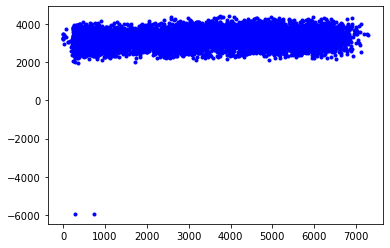

In [146]:
error_estimator(y_test, yn_pred, 'Linear Regression without feature engineering:')

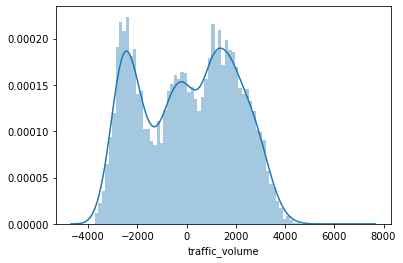

In [147]:
sns.distplot((y_test-yn_pred), bins = 75)

### 4.4.1 Model estimating

#### Linear Model

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
def error_estimator(y_test, y_pred, model_name):
    print(model_name)
    print('mean absolute error', mean_absolute_error(y_test, y_pred))
    print('mean squared error', np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.plot(y_test, y_pred, 'b.')

Linear Regression:
mean absolute error 942.8759100021327
mean squared error 1164.9145958979666


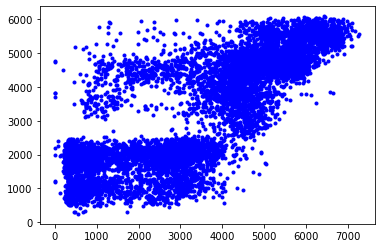

In [168]:
error_estimator(y_test, y_pred, 'Linear Regression:')

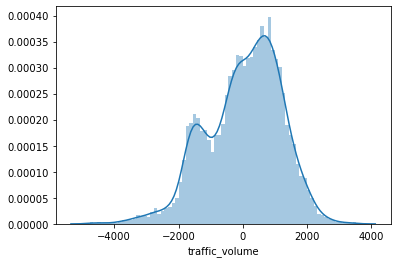

In [164]:
sns.distplot((y_test-y_pred), bins = 75)

#### Polynomial model

**Note** Я тут хотел использовать best_predict, с использованием графика, но в degree = 7 уже model.fit начинает зависать

Polynomial Regression:
mean absolute error 783.0619419021765
mean squared error 976.2029569172369


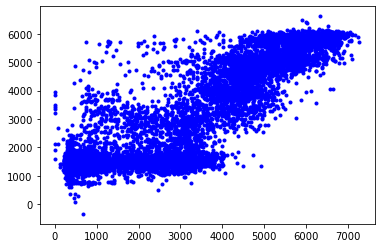

In [86]:
error_estimator(y_test, yp_pred, 'Polynomial Regression:')

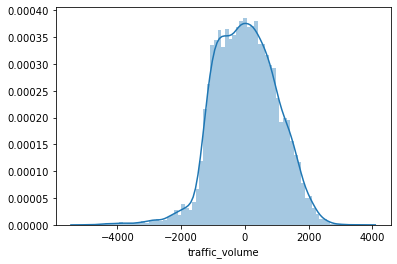

In [78]:
sns.distplot((y_test-yp_pred), bins = 75)

#### Lasso Regression

Lasso Regression:
mean absolute error 943.3814262961721
mean squared error 1164.974653190693


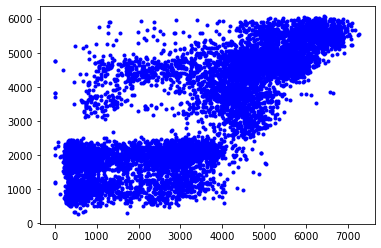

In [53]:
error_estimator(y_test, y_pred, 'Lasso Regression:')

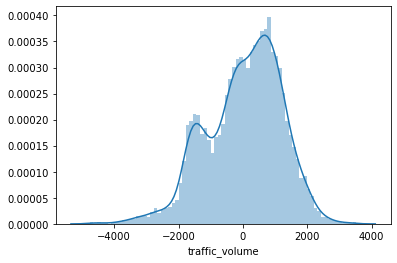

In [54]:
sns.distplot((y_test-y_pred), bins = 75)

#### ElasticNet model

ElasticNet Regression:
mean absolute error 1005.4912398755589
mean squared error 1195.931676655904


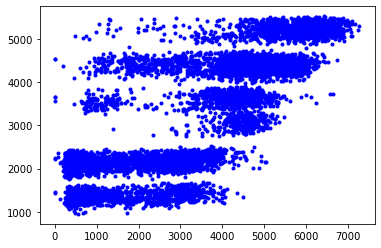

In [91]:
error_estimator(y_test, y_pred, 'ElasticNet Regression:')

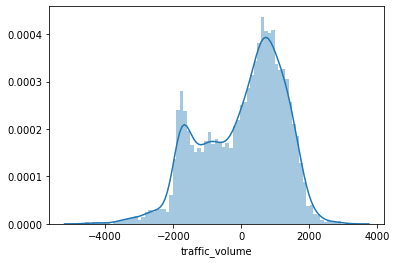

In [92]:
sns.distplot((y_test-y_pred), bins = 75)

#### SVR

SV Regression:
mean absolute error 779.1006718160087
mean squared error 1035.7149990140476


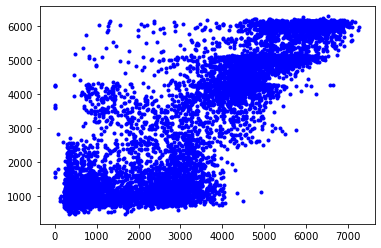

In [100]:
error_estimator(y_test, y_pred, 'SV Regression:')

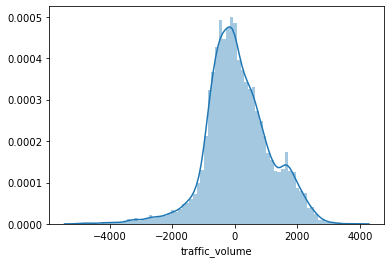

In [101]:
sns.distplot((y_test-y_pred), bins = 75)

#### Decision Tree Model

Decision Tree:
mean absolute error 830.1323782307404
mean squared error 1020.1543621730601


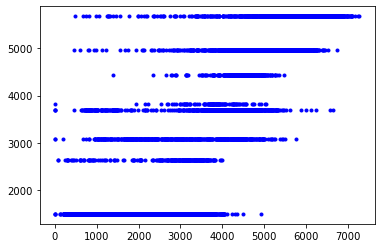

In [105]:
error_estimator(y_test, yt_pred, 'Decision Tree:')

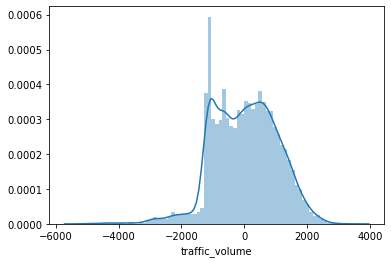

In [106]:
sns.distplot((y_test-yt_pred), bins = 75)

# That is all of my work. Thank you for attention!